In [42]:
import pandas as pd

data = pd.read_csv('/content/Book Data.csv')
data

,index,Publishing Year,Book Name,Author,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975,Beowulf,"Unknown, Seamus Heaney",Novice,3.42,155903,fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",Intermediate,4.23,145267,fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015,Go Set a Watchman,Harper Lee,Novice,3.31,138669,fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008,When You Are Engulfed in Flames,David Sedaris,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011,Daughter of Smoke & Bone,Laini Taylor,Intermediate,4.04,198283,fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1065,2014,Gray Mountain,John Grisham,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1043,1066,1989,The Power of One,Bryce Courtenay,Excellent,4.34,57312,fiction,846.94,508.164,7.99,1270,Random House LLC,106
1044,1067,1930,The Maltese Falcon,Dashiell Hammett,Intermediate,3.92,58742,fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1045,1068,2011,Night Road,Kristin Hannah,Excellent,4.17,58028,fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


# Degree Centrality

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-43-2356493e12be>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


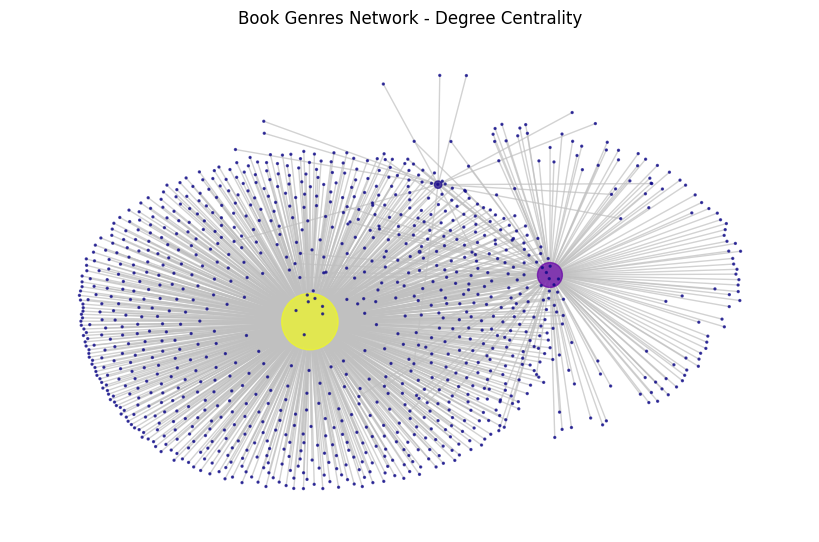

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

G = nx.Graph()

name = data['Book Name']
genre = data['genre']

for i in range(len(name)):
    G.add_edge(name[i], genre[i])

degree_centrality = nx.degree_centrality(G)

max_centrality = max(degree_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in degree_centrality.items()}

cmap = plt.cm.plasma
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

node_sizes = [v * 2000 for v in degree_centrality.values()]

pos = nx.spring_layout(G, k=0.8, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.7,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Degree Centrality", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()

In [41]:
sorted_by_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Degree Centrality:")
for node in top_4_nodes:
    centrality = degree_centrality[node]
    print(f"\t- {node}: {centrality}")

Top 4 Nodes with High Degree Centrality:
	- fiction: 0.8242597898758357
	- nonfiction: 0.16045845272206302
	- children: 0.014326647564469913
	- Persepolis: 0.0019102196752626551


# Closenness Centrality

<ipython-input-15-ed6413c63a3e>:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


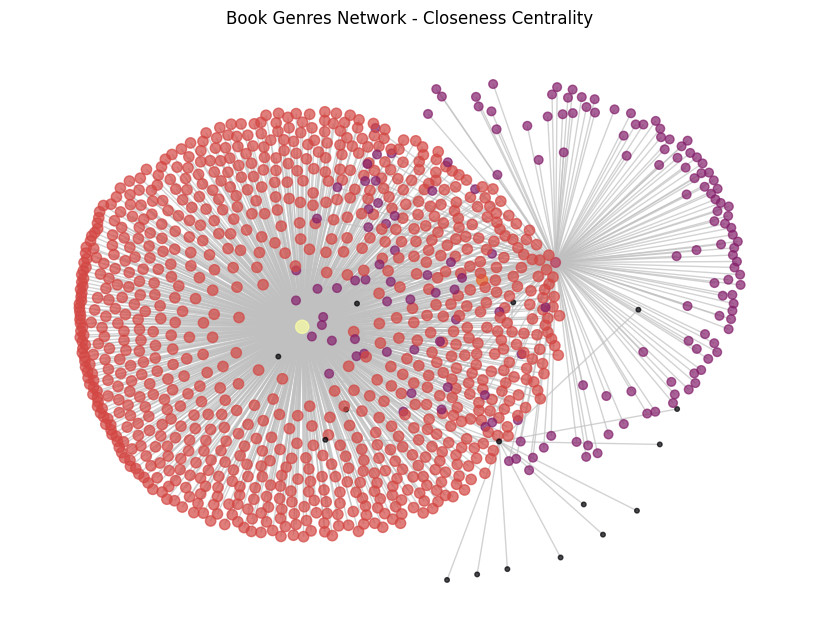

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

name = data['Book Name']
genre = data['genre']

plt.figure(figsize=(8, 6))

G = nx.Graph()

for i in range(len(name)):
    G.add_edge(name[i], genre[i])

closeness_centrality = nx.closeness_centrality(G)

max_centrality = max(closeness_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in closeness_centrality.items()}

cmap = plt.cm.inferno
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

base_size = 10

scaled_centrality = {k: v * 80 + base_size for k, v in normalized_centrality.items()}

node_sizes = [scaled_centrality[node] for node in G.nodes()]

pos = nx.spring_layout(G, k=0.8, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.7,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Closeness Centrality", fontsize=12)
plt.axis("off")

plt.tight_layout()

plt.show()

In [36]:
sorted_by_centrality = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Closeness Centrality:")
for node in top_4_nodes:
    centrality = closeness_centrality[node]
    print(f"\t- {node}: {centrality}")


Top 4 Nodes with High Closeness Centrality:
	- fiction: 0.7432243836884579
	- Persepolis: 0.4928371398633173
	- Beowulf: 0.4237247529709656
	- Batman: Year One: 0.4237247529709656


# Betweenness Centrality

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-11-c06ddbab0127>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


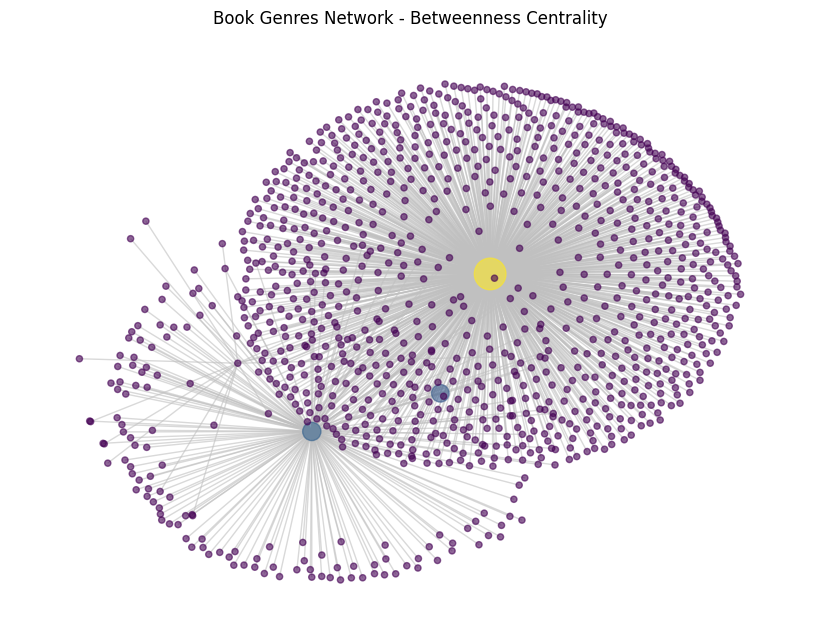

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

name = data['Book Name']
genre = data['genre']

plt.figure(figsize=(8, 6))

G = nx.Graph()

for i in range(len(name)):
    G.add_edge(name[i], genre[i])

betweenness_centrality = nx.betweenness_centrality(G)

max_centrality = max(betweenness_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in betweenness_centrality.items()}

cmap = plt.cm.viridis
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

base_size = 20

scaled_centrality = {k: v * 500 + base_size for k, v in normalized_centrality.items()}

node_sizes = [scaled_centrality[node] for node in G.nodes()]

pos = nx.spring_layout(G, k=0.8, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.6,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Betweenness Centrality", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()


In [33]:
sorted_by_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Betweenness Centrality:")
for node in top_4_nodes:
    centrality = betweenness_centrality[node]
    print(f"\t- {node}: {centrality}")

Top 4 Nodes with High Betweenness Centrality:
	- fiction: 0.9437306992024924
	- nonfiction: 0.28881389237391364
	- Persepolis: 0.26477178718764893
	- children: 0.00019175245306173882


# Eigenvector Centrality

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-20-9cf7779802c1>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


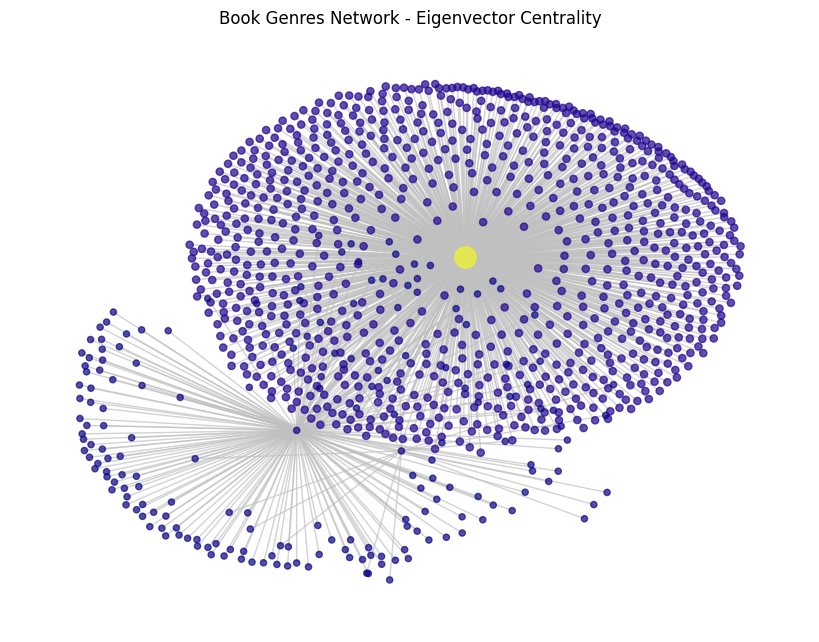

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

name = data['Book Name']
genre = data['genre']

plt.figure(figsize=(8, 6))

G = nx.Graph()

for i in range(len(name)):
    G.add_edge(name[i], genre[i])

eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

max_centrality = max(eigenvector_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in eigenvector_centrality.items()}

cmap = plt.cm.plasma
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

base_size = 20

scaled_centrality = {k: v * 300 + base_size for k, v in eigenvector_centrality.items()}

node_sizes = [scaled_centrality[node] for node in G.nodes()]

pos = nx.spring_layout(G, k=0.8, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.7,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Eigenvector Centrality", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()



In [31]:
sorted_by_centrality = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Eigenvector Centrality:")
for node in top_4_nodes:
    centrality = eigenvector_centrality[node]
    print(f"\t- {node}: {centrality}")

Top 4 Nodes with High Eigenvector Centrality:
	- fiction: 0.7071060492340033
	- Persepolis: 0.024104783015735067
	- é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng]: 0.024070149778402
	- Le FantÃ´me de l'OpÃ©ra: 0.024070149778401998


# Harmonic Centrality

<ipython-input-22-7a7c369a0309>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


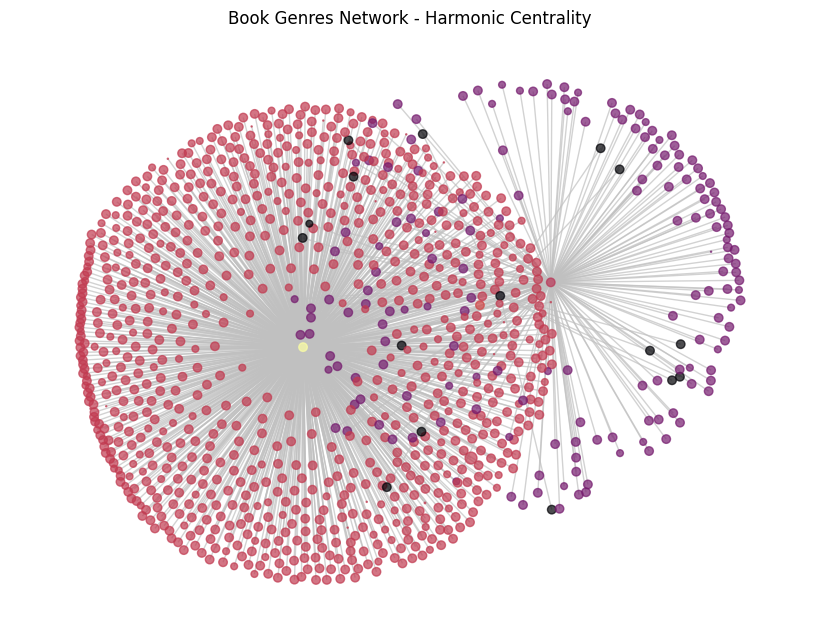

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

name = data['Book Name']
genre = data['genre']

plt.figure(figsize=(8, 6))

G = nx.Graph()

for i in range(len(name)):
  G.add_edge(name[i], genre[i])

harmonic_centrality = nx.harmonic_centrality(G)

max_centrality = max(harmonic_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in harmonic_centrality.items()}

cmap = plt.cm.inferno
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

node_sizes = [v * 0.08 for v in harmonic_centrality.values()]

pos = nx.spring_layout(G, k=0.8, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.7,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Harmonic Centrality", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()


In [29]:
sorted_by_centrality = sorted(harmonic_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Harmonic Centrality:")
for node in top_4_nodes:
    centrality = harmonic_centrality[node]
    print(f"\t- {node}: {centrality}")

Top 4 Nodes with High Harmonic Centrality:
	- fiction: 919.1666666666695
	- Persepolis: 516.5
	- Timeline: 474.0833333333333
	- The Year of the Flood: 474.0833333333333


# Katz Centrality

<ipython-input-23-1e910746d257>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


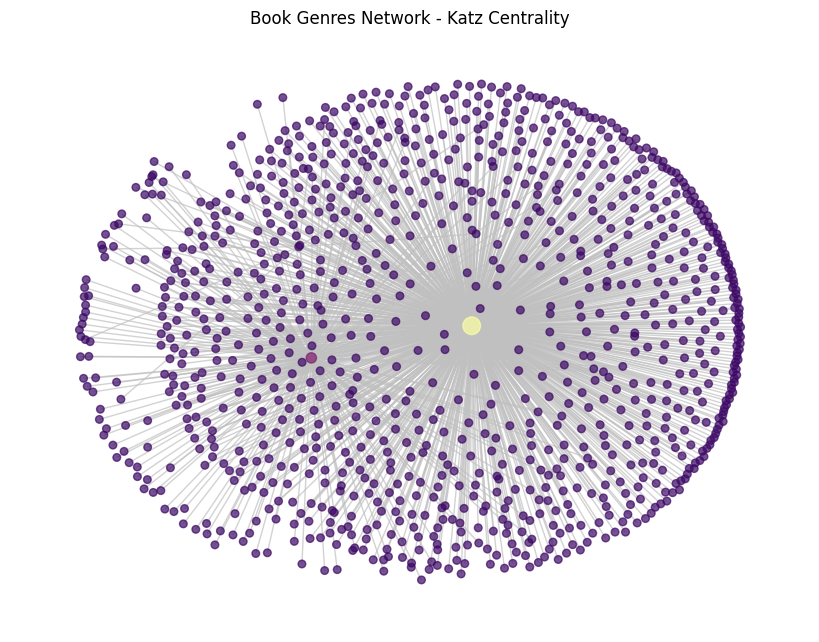

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

name = data['Book Name']
genre = data['genre']

plt.figure(figsize=(8, 6))

G = nx.Graph()

for i in range(len(name)):
    G.add_edge(name[i], genre[i])

alpha = 0.005
katz_centrality = nx.katz_centrality(G, alpha=alpha)

max_centrality = max(katz_centrality.values())
normalized_centrality = {k: v / max_centrality for k, v in katz_centrality.items()}

cmap = plt.cm.inferno
node_colors = [cmap(normalized_centrality[node]) for node in G.nodes()]

node_sizes = [v * 1000 for v in katz_centrality.values()]

pos = nx.spring_layout(G, k=1.0, iterations=200)

edge_color = "#c0c0c0"

nx.draw(
    G,
    pos=pos,
    node_color=node_colors,
    edge_color=edge_color,
    with_labels=False,
    node_size=node_sizes,
    alpha=0.7,
    font_size=8,
    width=1,
    cmap=cmap,
)

plt.title("Book Genres Network - Katz Centrality", fontsize=12)
plt.axis("off")
plt.tight_layout()
plt.show()


In [25]:
sorted_by_centrality = sorted(katz_centrality.items(), key=lambda item: item[1], reverse=True)
top_4_nodes = [node for node, _ in sorted_by_centrality[:4]]
print("Top 4 Nodes with High Katz Centrality:")
for node in top_4_nodes:
    centrality = katz_centrality[node]
    print(f"\t- {node}: {centrality}")

Top 4 Nodes with High Katz Centrality:
	- fiction: 0.16160828019259213
	- nonfiction: 0.05497458424817616
	- children: 0.031993043406294025
	- Persepolis: 0.030832718102497266
